## D209 Data Mining 1 PA
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Technique Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Panopto Video</a></li>
</ol>


<h4 id="A">Research Question</h4>
<h5>Question</h5>
<p>The question that I had decided to answer is "Are there meaningful groups with distinct, identifiable preferences in the telecommunications industry?". I will use hierarchical clustering to attempt to create these clusters, helping the business to group customers based on important criteria</p>
<h5>Goal</h5>
<p>The goal of this analysis will be to determine the existence of meaningful groups/clusters within the scores they provide for the survey responses. This could help the business to identify customer priorities and improve their service offerings going forward.</p>
<h4 id="B">Technique Justification</h4>
<h5>Clustering Technique Explanation</h5>
<p>Hierarchical clustering is the technique that will be used to analyze the data. This method gathers observations in the raw data and generates multi-leveled clusters, where we have clusters that contain clusters within it. These clusters are formed by groups that are closely related. Then, these clusters are analyzed and clustered together into an intermediate cluster. The intermediate clusters are then grouped together in a similar manner, until all the data is contained within one overall cluster. This is commonly explained by looking at taxonomy, where similar animals form a species, multiple species for. a genus, multiple genuses form a family, and so on until every living thing is grouped together under the "Living" category. 
The expected outcome would be a hierarchy that allows us to look at labelled distribution to identify patterns in consumer sentiment.</p>
<h5>Assumptions</h5>
<p>Hierarchical clustering groups together the data based on the distance between observations. This means that the hierarchical clustering method assumes the data is appropriately scaled. Failing to scale the data will lead to variables with larger ranges having an outsized influence on the cluster formation, and those with smaller ranges having decreased influence on the cluster formation</p>
<h5>Chosen Tools</h5>
<p>Python is the language I elected to use for this analysis, for a number of reasons. First, Python's Jupyter notebook makes it simple to combine the Python code with explanations in one file. Furthermore, the simple syntax makes it easy and intuitive to develop, troubleshoot, and understand the methodology used to cluster the data. Finally, there are a number of packages and libraries that are specifically designed for this type of analysis. The packages and libraries that I intend to use are as follows: 
<ul>
<li>Pandas: Allows for the ingestion and handling of the data in dataframes</li>
<li>Seaborn and Matplotlib for data visualization</li>
<li>NumPy for mathematic operations</li>
<li>SciPy to perform hierarchical clustering and graphic representation</li>
<li>SciKitLearn to evaluate the clustering metric</li>
</ul></p>

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

df = pd.read_csv('./Data Source/churn_clean.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

<h4 id="C">Data Preparation</h4>
<h5>Example of Preprocessing Goals</h5>
<p>Overall, we have a number of preprocessing goals before we can utilize the data for this analysis. One such goal is to remove unnecessary columns irrelevant to the analysis. This is important because reducing the overall amount of data included in the analysis will optimize the code's performance and improve the overall efficienct if this analysis</p>
<h5>Initital Dataset Variables</h5>
<p>There are only a handful of relevant variables being considered for this analysis, including:
<ul>
<li>Item1 (Ordinal Categorical): The importance of timely responses, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item2 (Ordinal Categorical): The importance of timely fixes to issues, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item3 (Ordinal Categorical): The importance of timely replacement of devices, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item4 (Ordinal Categorical): The importance of technological reliability, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item5 (Ordinal Categorical): The importance of variety of options, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item6 (Ordinal Categorical): The importance of respectful responses, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item7 (Ordinal Categorical): The importance of courteous exchanges and discussions, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
<li>Item8 (Ordinal Categorical): The importance of observable active listening, with values ranging from 1 to 8, with higher numbers indicating least importance</li>
</ul>
It is important to note that numerical data is not necessarily quantitative or continuous data. All of the above variables are stored specifically as integers, and indicate a priority level. These scores are meant to order the importance of the factors, rather than the numbers indicating that, for example, an item with a score of 6 is half as important as an item with a score of 3. As this is meant to establish an order to establish overall importance of factors, these variables would be considered ordinal and categorical, not quantitative and continuous.</p>
<h5>Data Preparation</h5>
<p>Below, the steps used to prepare the data are included. The first step in the analysis will be to drop those columns that are not relevant for the analysis</p>

In [2]:
df = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
df.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,
1,5,5,5,3,4,4,3,4
2,3,4,3,3,4,3,4,4
3,4,4,2,4,4,3,3,3
4,4,4,4,2,5,4,3,3
5,4,4,4,3,4,4,4,5


<p>The next step in the analysis will be to ensure there are no invalid entries. This means that we need to check the remaining columns such that there are no null values or values outside of the acceptable 1-8 range</p>

In [3]:
# Filter the dataframe to ensure all values are between 1 and 8 (inclusive)
df = df[(df >= 1) & (df <= 8)].dropna()
df.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,
1,5,5,5,3,4,4,3,4
2,3,4,3,3,4,3,4,4
3,4,4,2,4,4,3,3,3
4,4,4,4,2,5,4,3,3
5,4,4,4,3,4,4,4,5


<h5>Copy of Cleaned Data</h5>
<p>A copy of this cleaned and prepared data will be exported at this point, and will be attached to this submission:</p>

In [4]:
df.to_csv('./D212P1CleanedData.csv')

<h4 id="D">Analysis</h4>
<h5>Cluster Number</h5>

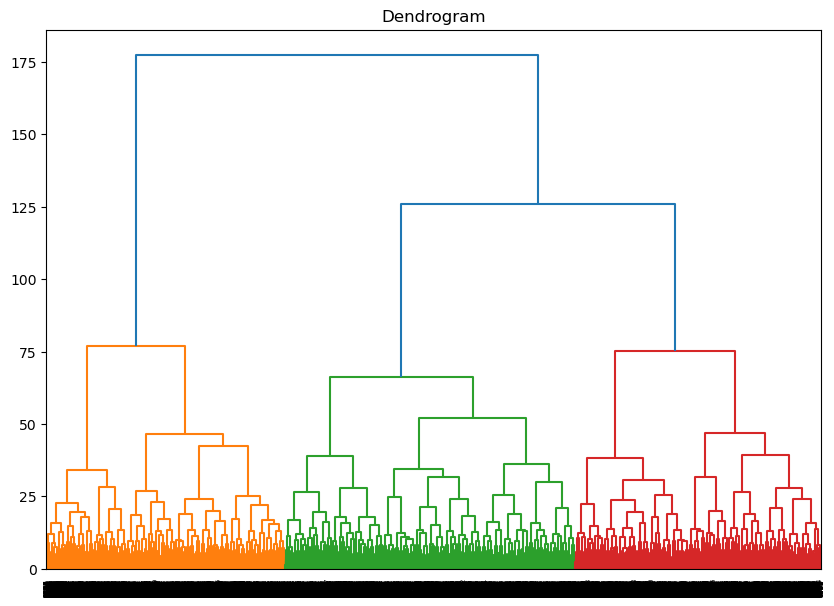

In [5]:
# Perform hierarchical clustering
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.show()

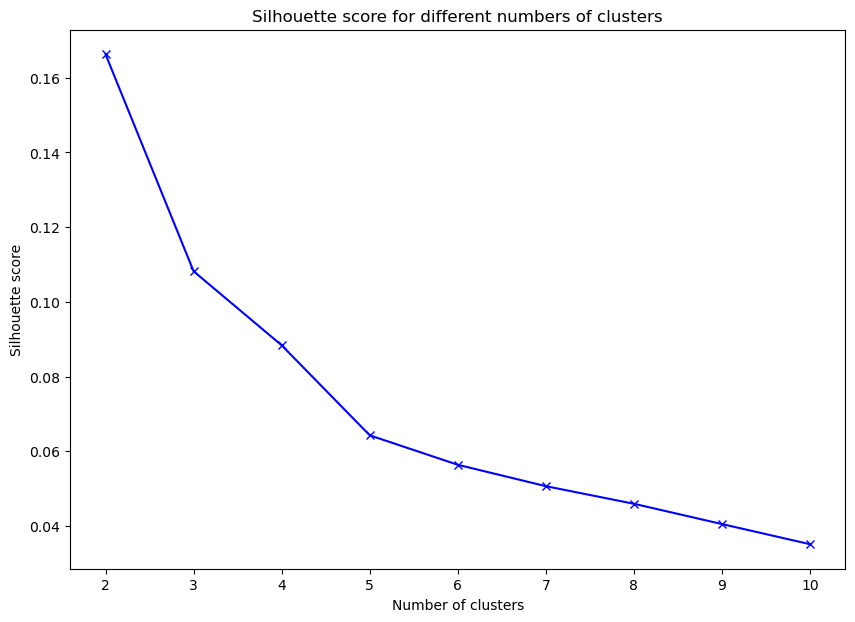

In [6]:
# Calculate silhouette scores for different numbers of clusters
range_n_clusters = list(range(2, 11))
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Create clusters
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    
    # Calculate the silhouette score
    silhouette_avg.append(silhouette_score(df, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different numbers of clusters')
plt.show()

<p>The silhouette score indicates that the ideal number of clusters to use in the partitioning of the data is 2, so this is the number of clusters that we will be creating in this analysis.</p>
<h5>Cluster Analysis</h5>
<p>Below, we will be performing the actual clustering analysis: </p>

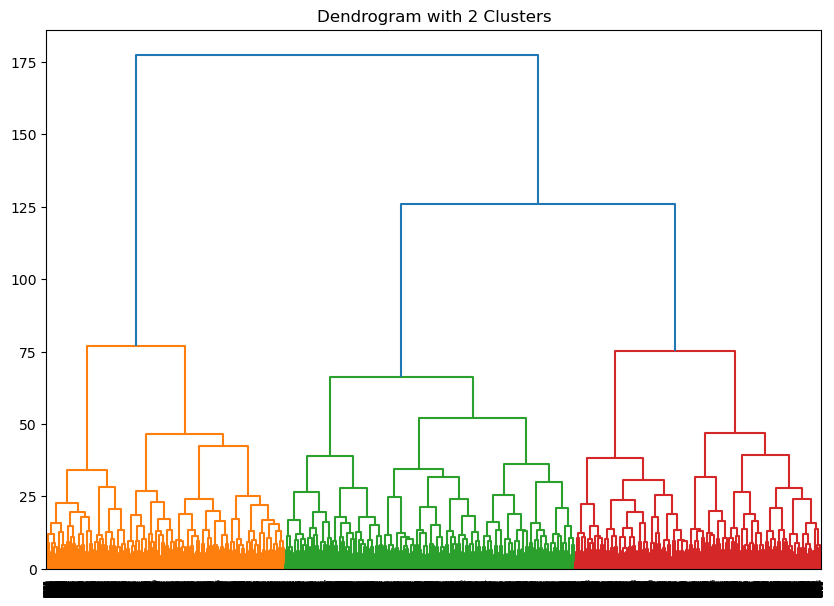

cluster_labels
1    3085
2    6915
Name: count, dtype: int64


In [9]:
# Perform hierarchical clustering with 2 clusters
num_clusters = 2
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
df['cluster_labels'] = clusters

# Display the first few rows of the dataframe with the cluster labels

# Plot the dendrogram for visualization
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with 2 Clusters")
dendrogram(Z)
plt.show()

print(df['cluster_labels'].value_counts().sort_index())

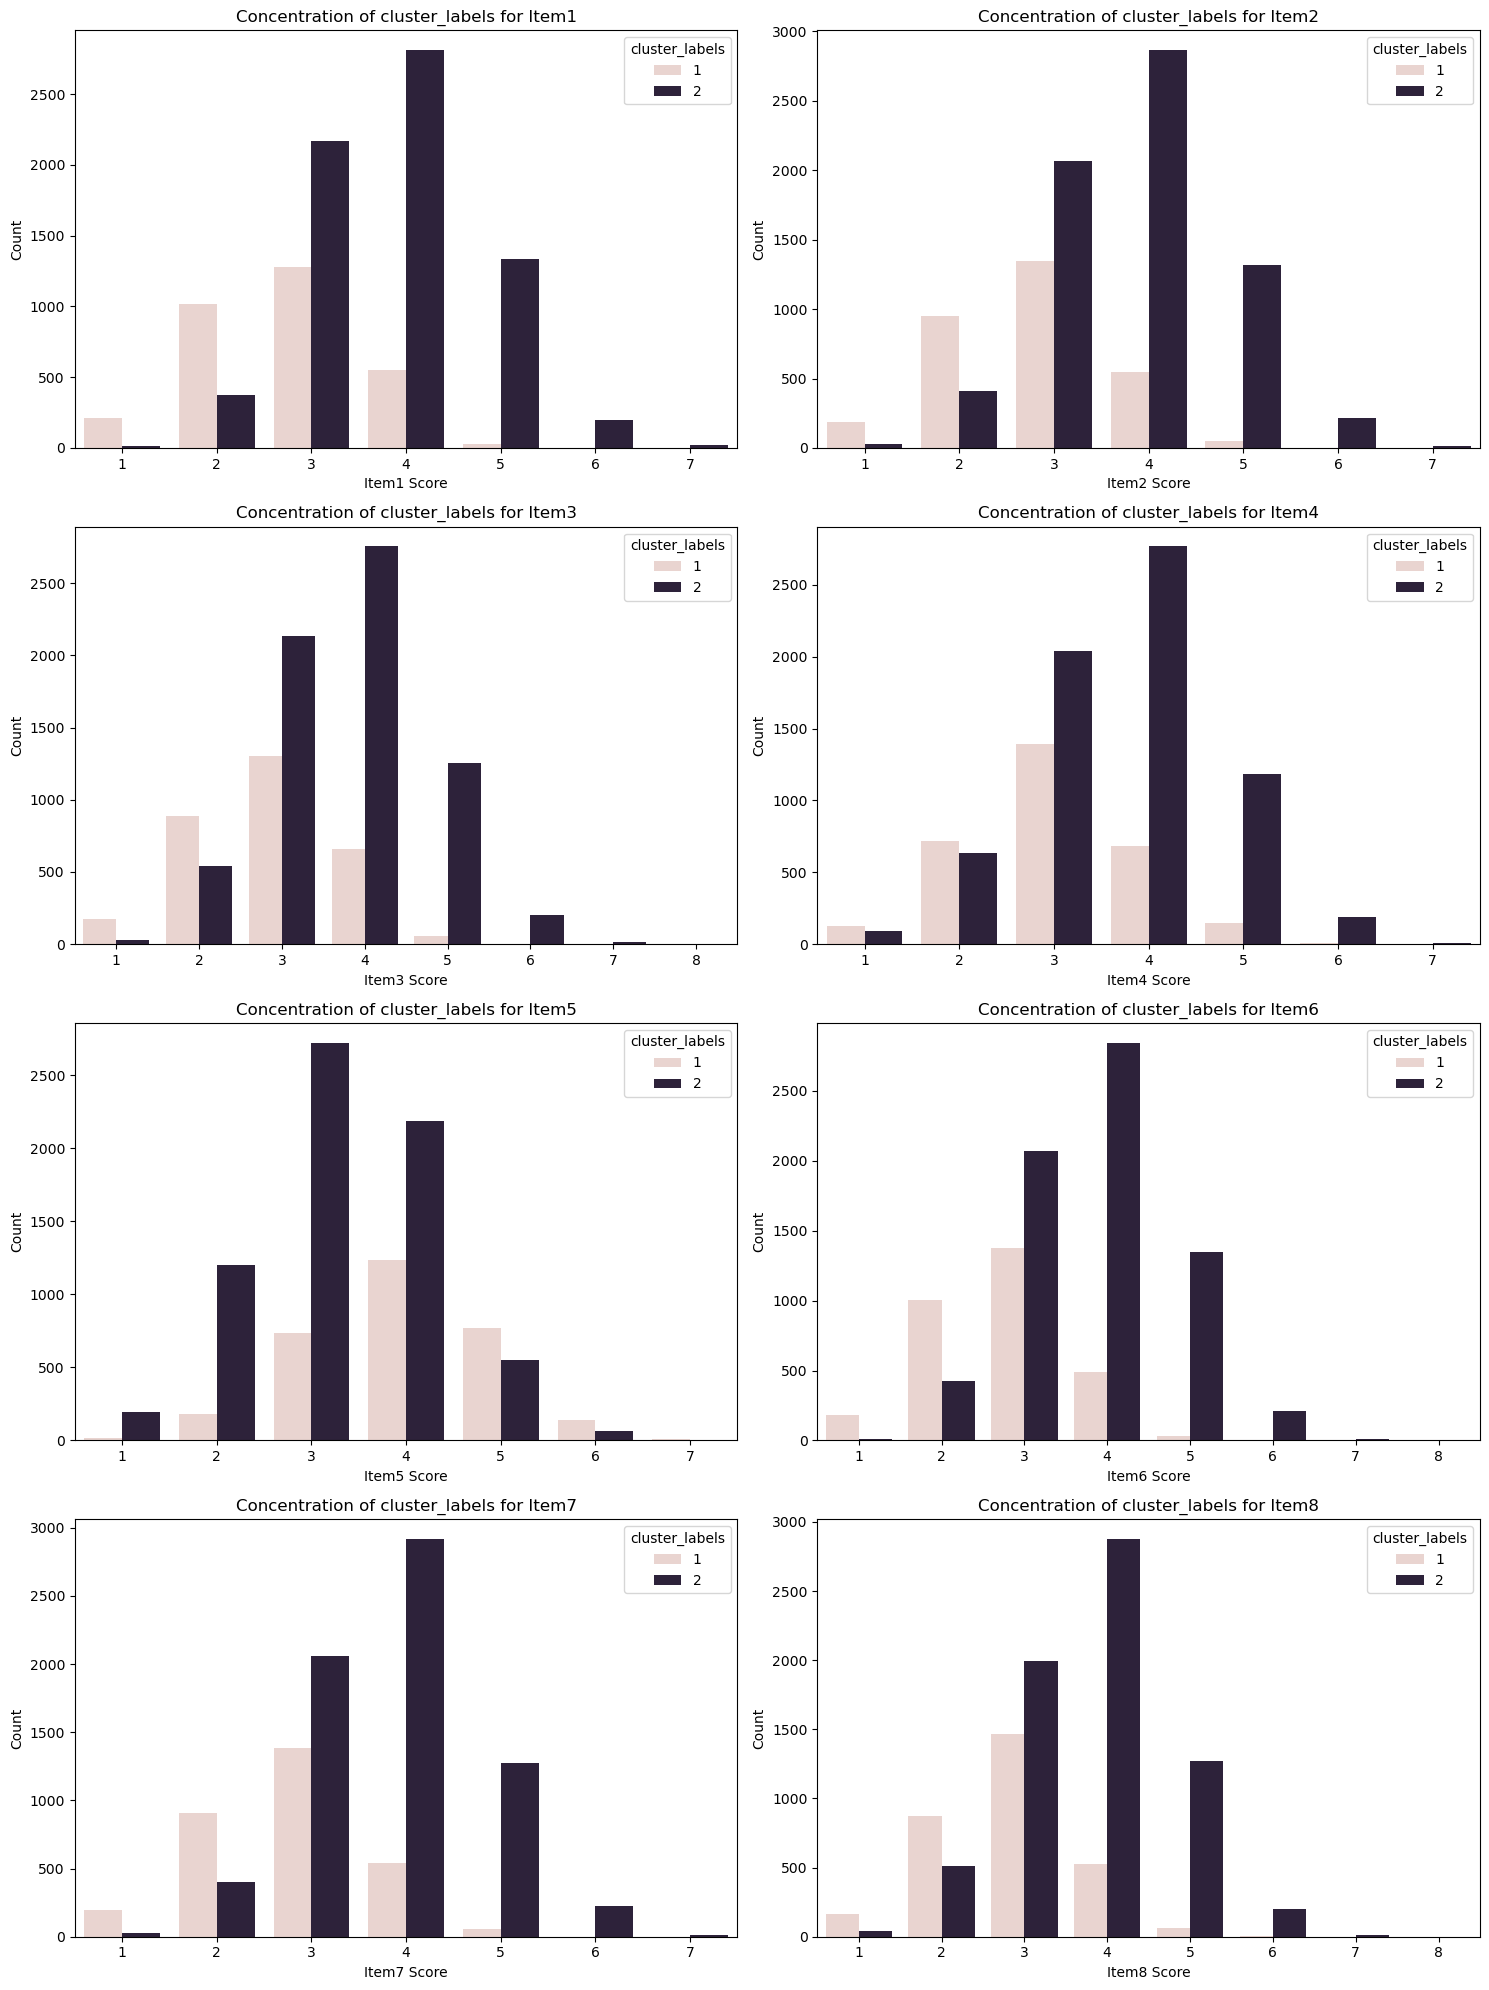

In [10]:
# Set up the matplotlib figure
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# List of items
items = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

# Loop through each item and create a count plot
for i, item in enumerate(items):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=item, hue='cluster_labels', ax=axes[row, col])
    axes[row, col].set_title(f'Concentration of cluster_labels for {item}')
    axes[row, col].set_xlabel(f'{item} Score')
    axes[row, col].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Calculate the average for each item column based on the cluster labels
summary_df = df.groupby('cluster_labels').mean().T
summary_df.columns = ['cluster_1', 'cluster_2']

# Display the summary dataframe
print(summary_df)

       cluster_1  cluster_2
Item1   2.727715   3.831236
Item2   2.782496   3.827477
Item3   2.851540   3.770499
Item4   3.013614   3.713377
Item5   3.980551   3.275343
Item6   2.740357   3.834996
Item7   2.792545   3.829356
Item8   2.822690   3.795806


<h4>Summary and Implications</h4>
<h5>Quality of clusters</h5>
<p>Though a hierarchical analysis cannot be evaluated on the basis of "accuracy," given the lack of labels to compare the clusters against, the silhouette score that we calculated earlieris also a coefficient to determine the relative effectiveness of the clustering model.</p>

In [13]:
print(silhouette_avg[0])

0.16630873939407875


<p>We can see the silhouette score above, and it is 0.166. This score is on a range from -1 to 1, with -1 indicating bad clustering that is completely unhelpful for the analysis, and 1 meaning that the clustering is very good and the clusters are very well-defined and dense. With our score being 0.166, we can determine that there are recognizable clusters, but that these clusters contain some overlap and poor definition.In other words, the data, though it does contain patterns, has a lot of similarity between the 2 clusters that were created</p>
<h5>Results and Implications</h5>
Overall, as mentioned above, we do see recognizable, though not completely distinct clusters in the data. Within these patterns, we can observe certain characteristics. One such characteristic is that the individuals in cluster 2 seem to have higher mean scores on all topics than cluster 1, with the exception of Item5, which represents the variety of options. In other words, those in cluster 2, which represents roughly 60% of the overall customers, consider variety to be the most important metric (though only by a margin of 0.5-0.6), whereas cluster 1 is very disinterested in the number of options available to them, being roughly 1.2 points away from most other item priorities. Attempting to interpret this data, to most customers, variety is slightly important, but a sizeable segment of employees distinctly and clearly have almost no concern for the variety of options. The natural implication of this data is that item 5 is the least critical factor for retaining and monetizing customers, and that, though we don't want to worsen the quality of our variety, improving in the other areas would be more effective at guranteeing customer satisfaction.</p>
<h5>Limitation</h5>
<p>The primary limitation of the data is the lack of distinction in results. Customers overwhelmingly rate every priority a 3 or a 4, creating a sizable degree of ambiguity as to what the customer actually cares about. If the results of these questions were instead in a format that required customers to simply rank the priorities relative to each other, rather than allowing for the same customer to have the same rating for different columns, then we would likely see more clearly defined patterns in the data.</p>
<h5>Recommendations</h5>
<p>In terms of recommendations, I do not think there are any useful insights that can be derived from this analysis directly. However, the ambiguity in the results does communicate clearly an ideal next step for the business. Just because these questions were not useful does not mean that existing patterns do not exist in customer sentiment. As such, asking customers questions in a different format may be more useful. Should the questions be asked in a manner that forces a hierarchy of priorities, rather tahn just an abstract, ill-defined score may be helpful. As such, it would be advisable to survey customers and require that they rank each of the items, such that all customers have an answer for the single most and least important factor (as well as all in between) would be useful in creating clearer distinctions and driving useful insights.</p>